In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

## Pre-trained network

In [ ]:
# load up general network training results
with open('general/results.pkl', 'rb') as f:
    general = pickle.load(f)

In [3]:
list(general['subtask_losses'])

[0, 1, 2]

In [4]:
general['codes']

[[0], [1], [0, 1]]

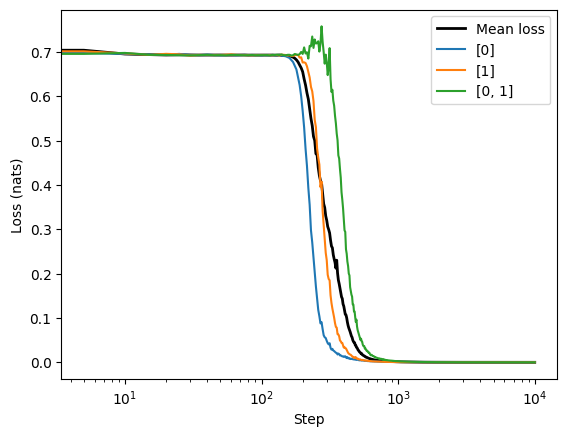

In [5]:
plt.plot(general['steps'], general['losses'], color='black', label='Mean loss', linewidth=2)

for i in range(len(general['codes'])):
    code = general['codes'][i]
    plt.plot(general['steps'], general['subtask_losses'][i], label=f'{code}')

plt.xlabel('Step')
plt.ylabel('Loss (nats)')
plt.xscale('log')
plt.legend()

## Prune-tuned network

In [6]:
with open('pruning/results.pkl', 'rb') as f:
    pruning = pickle.load(f)

Text(0, 0.5, 'Sparsity loss')

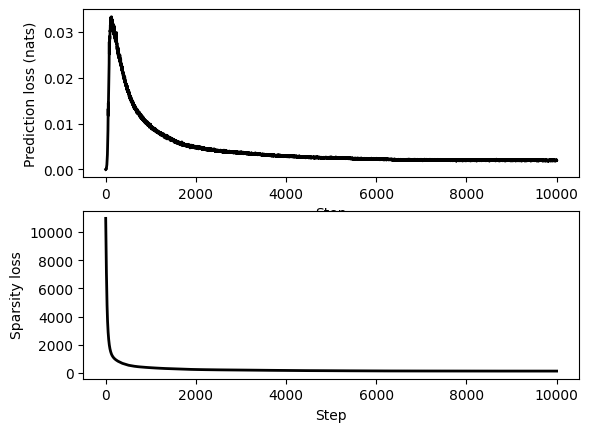

In [7]:
plt.subplot(2, 1, 1)
plt.plot(pruning['steps'], pruning['pred_losses'], color='black', linewidth=2)
plt.xlabel('Step')
plt.ylabel('Prediction loss (nats)')

plt.subplot(2, 1, 2)
plt.plot(pruning['steps'], pruning['sparsity_losses'], color='black', linewidth=2)
plt.xlabel('Step')
plt.ylabel('Sparsity loss')


In [9]:
widths = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
fromscratch = {}
for width in widths:
    with open(f'fromscratch/results-width{width:04d}.pkl', 'rb') as f:
        fromscratch[width] = pickle.load(f)

Text(0, 0.5, 'Loss (nats)')

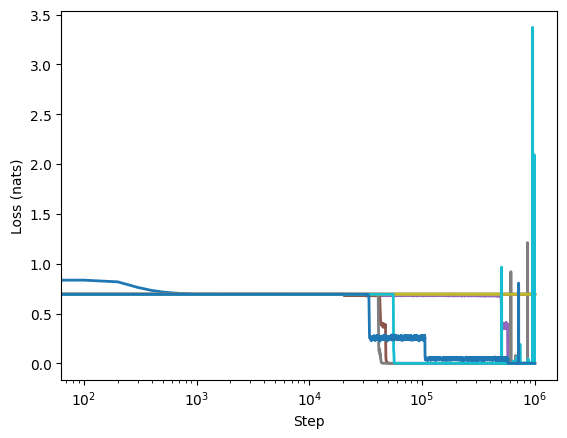

In [10]:
for width in widths:
    plt.plot(fromscratch[width]['steps'], fromscratch[width]['losses'], label=f'{width}', linewidth=2)
plt.xscale('log')
plt.xlabel('Step')
plt.ylabel('Loss (nats)')

In [35]:
# get the steps at which these fromscratch networks achieve loss less than 1e-2
fromscratch_neurons = []
fromscratch_samples = []
for width in widths:
    steps = fromscratch[width]['steps']
    losses = np.array(fromscratch[width]['losses'])
    if min(losses) < 1e-2:
        fromscratch_neurons.append(width * 2)
        first_step = steps[np.where(losses < 1e-2)[0][0]]
        fromscratch_samples.append(first_step * 2_000) # 2k samples per batch during training from scratch

Text(0.5, 1.0, 'Task: learn the combination of two k=3 sparse parity subtasks')

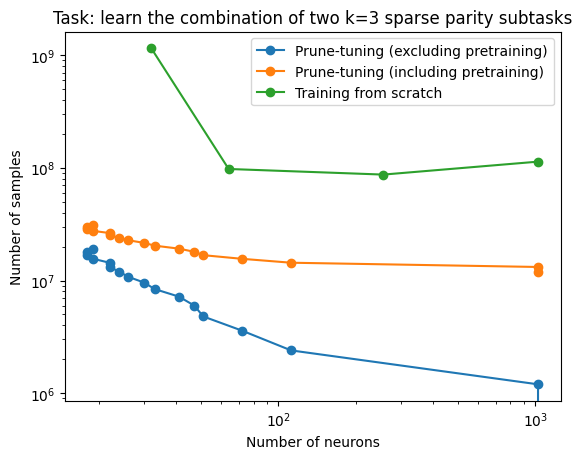

In [41]:
pruning_samples = np.array(pruning['remaining_neuerons_steps']) * 2_000 # 2k samples per batch during pruning
pruning_samples_plus_pretraining = pruning_samples + 6_000 * 2_000 # from the above plot, we appear to have gotten convergence after 2k steps
plt.plot(
    pruning['remaining_neurons'][::20], 
    pruning_samples[::20], 
    'o-',
    label="Prune-tuning (excluding pretraining)")

plt.plot(
    pruning['remaining_neurons'][::20], 
    pruning_samples_plus_pretraining[::20], 
    'o-',
    label="Prune-tuning (including pretraining)"
)

plt.plot(
    fromscratch_neurons[:-1], 
    fromscratch_samples[:-1], 
    'o-',
    label="Training from scratch"
)

plt.yscale('log')
plt.xscale('log')
plt.xlabel("Number of neurons")
plt.ylabel("Number of samples")
plt.legend()
plt.title("Task: learn the combination of two k=3 sparse parity subtasks")